<a href="https://colab.research.google.com/github/M-FoysalAhmed/Machine-Learning/blob/main/ML_project_Obesity_Levels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**At first, import all the Library**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

Import the dataset

In [ ]:
df = pd.read_csv('/content/obesity.csv')
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


**Convert the catagorical data into string**

In [ ]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [ ]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,0,1.62,64.0,3,0,2.0,3.0,0,0,2.0,1,0.0,1.0,2,3,1
1,21.0,0,1.52,56.0,2,0,3.0,3.0,1,1,3.0,1,3.0,0.0,2,3,1
2,23.0,1,1.80,77.0,1,0,2.0,3.0,0,0,2.0,1,2.0,1.0,2,3,1
3,27.0,1,1.80,87.0,1,0,3.0,3.0,0,0,2.0,0,2.0,0.0,2,4,5
4,22.0,1,1.78,89.8,2,0,2.0,1.0,0,0,2.0,0,0.0,0.0,2,3,6


Split the dataset into features and target

In [ ]:
x = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

Normalize the features

In [ ]:
scaler = MinMaxScaler()
x = scaler.fit_transform(X)

Now define parameters

In [ ]:
test_size = 0.25
learning_rates = [0.001, 0.01, 0.1]
activation_functions = ['logistic', 'tanh', 'relu']
max_iter_values = [100, 1000, 10000]

Store accuracy score for each model and parameter

In [ ]:
accuracy_scores = {'Logistic Regression': [], 'Naive Bayes': [], 'Neural Network': []}
iteration_count = 0

Store accuracy score for each learning rate

In [ ]:
learning_rate_scores = {'Logistic Regression': {}, 'Naive Bayes': {}, 'Neural Network': {}}
for lr in learning_rates:
    learning_rate_scores['Logistic Regression'][lr] = []
    learning_rate_scores['Naive Bayes'][lr] = []
    learning_rate_scores['Neural Network'][lr] = []

Update model with new learning rate, activating function, iterations

In [ ]:
def update_models(test_size, learning_rate, activation_function, max_iter):
    global iteration_count

    # split the dataset into training and testing
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

    # Train a Logistic Regression classifier
    logistic_regression = LogisticRegression(max_iter=1000)
    logistic_regression.fit(x_train, y_train)
    predictions_logistic_regression = logistic_regression.predict(x_test)
    accuracy_logistic_regression = accuracy_score(y_test, predictions_logistic_regression)
    accuracy_scores['Logistic Regression'].append(accuracy_logistic_regression)
    learning_rate_scores['Logistic Regression'][learning_rate].append(accuracy_logistic_regression)

    # Train a Naive Bayes classifier
    naive_bayes = MultinomialNB()
    naive_bayes.fit(x_train, y_train)
    predictions_naive_bayes = naive_bayes.predict(x_test)
    accuracy_naive_bayes = accuracy_score(y_test, predictions_naive_bayes)
    accuracy_scores['Naive Bayes'].append(accuracy_naive_bayes)
    learning_rate_scores['Naive Bayes'][learning_rate].append(accuracy_naive_bayes)

    # Train a Neural Network
    mlp = MLPClassifier(activation=activation_function, max_iter=max_iter, learning_rate_init=learning_rate, hidden_layer_sizes=(100,))
    mlp.fit(x_train, y_train)
    predictions_mlp = mlp.predict(x_test)
    accuracy_mlp = accuracy_score(y_test, predictions_mlp)
    accuracy_scores['Neural Network'].append(accuracy_mlp)
    learning_rate_scores['Neural Network'][learning_rate].append(accuracy_mlp)

    # after updating models increment iteration count
    iteration_count += 1

    # Print accuracy and confusion matrices
    print(f"\nIteration {iteration_count} - Learning Rate: {learning_rate}, Activation Function: {activation_function}, Max Iter: {max_iter}")
    print(f"Accuracy for Logistic Regression = {accuracy_logistic_regression:.6f}")
    print(f"Accuracy for Naive Bayes = {accuracy_naive_bayes:.6f}")
    print(f"Accuracy for Neural Network with {activation_function} activation function = {accuracy_mlp:.6f}")

    print("\nConfusion Matrix for Logistic Regression:")
    print(confusion_matrix(y_test, predictions_logistic_regression))
    print("\nConfusion Matrix for Naive Bayes:")
    print(confusion_matrix(y_test, predictions_naive_bayes))
    print("\nConfusion Matrix for Neural Network:")
    print(confusion_matrix(y_test, predictions_mlp))

    plot_comparison_curve()


Function for plot curve

In [ ]:
def plot_comparison_curve():
    plt.figure(figsize=(8, 6))
    for model, scores in accuracy_scores.items():
        plt.plot(range(iteration_count), scores, label=model)
    plt.xlabel('Parameter Setting')
    plt.ylabel('Accuracy')
    plt.title('Model Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 28 - Learning Rate: 0.001, Activation Function: logistic, Max Iter: 100
Accuracy for Logistic Regression = 0.721591
Accuracy for Naive Bayes = 0.424242
Accuracy for Neural Network with logistic activation function = 0.611742

Confusion Matrix for Logistic Regression:
[[61  4  0  0  0  2  1]
 [24 29  1  0  0 11 13]
 [ 0  0 63 17  4  5  5]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3  8  3  0  0 43 14]
 [ 0  2 15  5  1  7 33]]

Confusion Matrix for Naive Bayes:
[[26  5 16  0 17  3  1]
 [13 15 10  9 23  3  5]
 [ 0  0 47 10 34  1  2]
 [ 0  0 35 40  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3 10 20  5 23 10  0]
 [ 0  0 26  8 21  0  8]]

Confusion Matrix for Neural Network:
[[53  9  0  0  0  3  3]
 [31 19  6  4  2  9  7]
 [ 1  0 51 22  6  5  9]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [11  7 13  4  0 28  8]
 [ 3  4 15 13  4  4 20]]


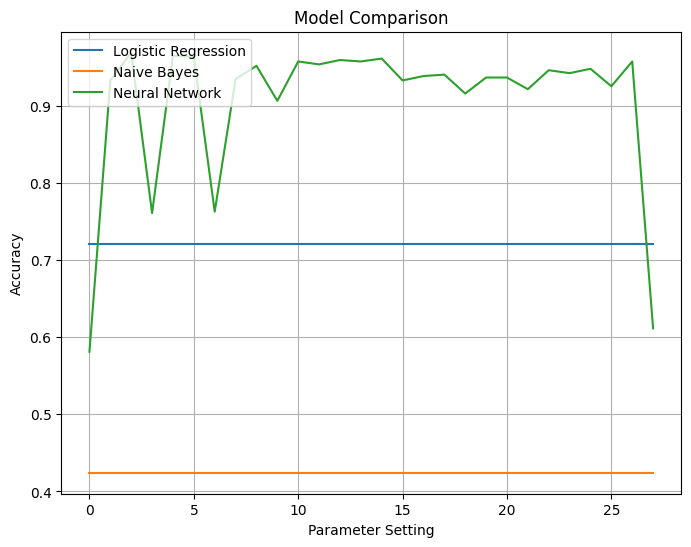

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 29 - Learning Rate: 0.001, Activation Function: logistic, Max Iter: 1000
Accuracy for Logistic Regression = 0.721591
Accuracy for Naive Bayes = 0.424242
Accuracy for Neural Network with logistic activation function = 0.943182

Confusion Matrix for Logistic Regression:
[[61  4  0  0  0  2  1]
 [24 29  1  0  0 11 13]
 [ 0  0 63 17  4  5  5]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3  8  3  0  0 43 14]
 [ 0  2 15  5  1  7 33]]

Confusion Matrix for Naive Bayes:
[[26  5 16  0 17  3  1]
 [13 15 10  9 23  3  5]
 [ 0  0 47 10 34  1  2]
 [ 0  0 35 40  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3 10 20  5 23 10  0]
 [ 0  0 26  8 21  0  8]]

Confusion Matrix for Neural Network:
[[68  0  0  0  0  0  0]
 [ 6 67  0  0  0  5  0]
 [ 0  0 90  4  0  0  0]
 [ 0  0  0 75  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 0  3  0  0  0 63  5]
 [ 0  0  2  0  0  4 57]]


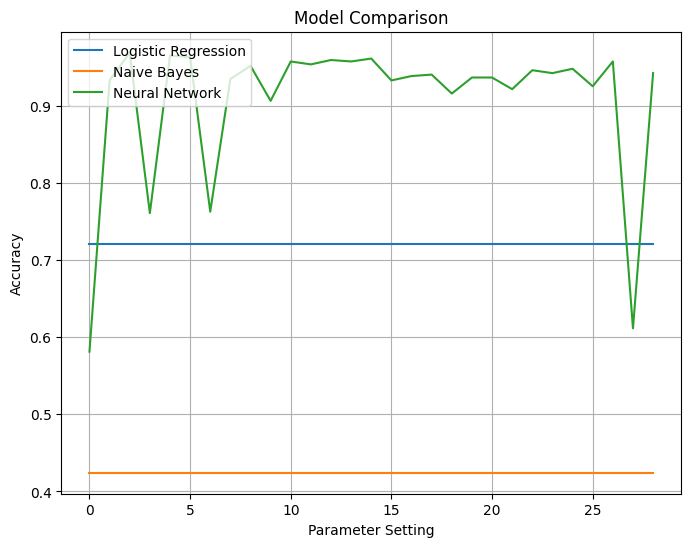


Iteration 30 - Learning Rate: 0.001, Activation Function: logistic, Max Iter: 10000
Accuracy for Logistic Regression = 0.721591
Accuracy for Naive Bayes = 0.424242
Accuracy for Neural Network with logistic activation function = 0.967803

Confusion Matrix for Logistic Regression:
[[61  4  0  0  0  2  1]
 [24 29  1  0  0 11 13]
 [ 0  0 63 17  4  5  5]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3  8  3  0  0 43 14]
 [ 0  2 15  5  1  7 33]]

Confusion Matrix for Naive Bayes:
[[26  5 16  0 17  3  1]
 [13 15 10  9 23  3  5]
 [ 0  0 47 10 34  1  2]
 [ 0  0 35 40  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3 10 20  5 23 10  0]
 [ 0  0 26  8 21  0  8]]

Confusion Matrix for Neural Network:
[[68  0  0  0  0  0  0]
 [ 5 71  0  0  0  2  0]
 [ 0  0 92  2  0  0  0]
 [ 0  0  0 75  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 0  3  0  0  0 66  2]
 [ 0  0  1  0  0  1 61]]


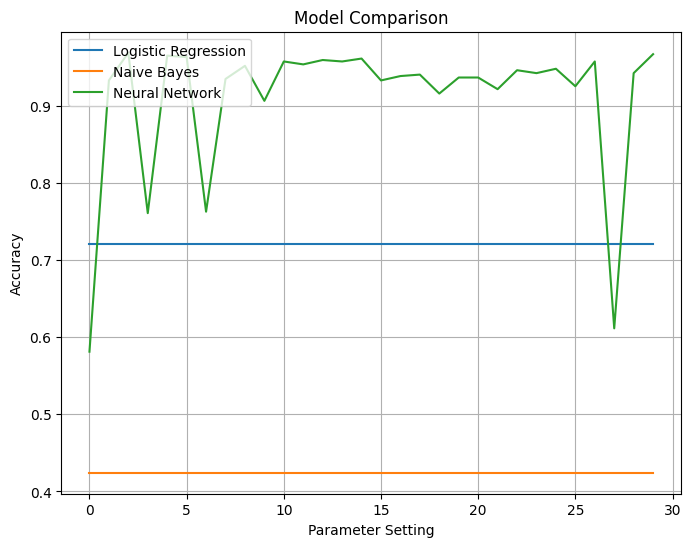

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 31 - Learning Rate: 0.001, Activation Function: tanh, Max Iter: 100
Accuracy for Logistic Regression = 0.721591
Accuracy for Naive Bayes = 0.424242
Accuracy for Neural Network with tanh activation function = 0.765152

Confusion Matrix for Logistic Regression:
[[61  4  0  0  0  2  1]
 [24 29  1  0  0 11 13]
 [ 0  0 63 17  4  5  5]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3  8  3  0  0 43 14]
 [ 0  2 15  5  1  7 33]]

Confusion Matrix for Naive Bayes:
[[26  5 16  0 17  3  1]
 [13 15 10  9 23  3  5]
 [ 0  0 47 10 34  1  2]
 [ 0  0 35 40  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3 10 20  5 23 10  0]
 [ 0  0 26  8 21  0  8]]

Confusion Matrix for Neural Network:
[[65  2  0  0  0  1  0]
 [24 33  0  0  0 12  9]
 [ 0  0 69 17  3  2  3]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 0  8  2  0  0 45 16]
 [ 0  1 12  1  0  9 40]]


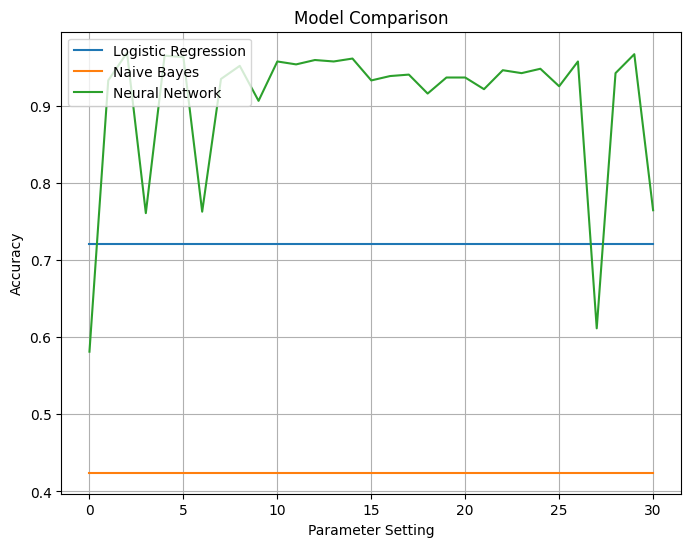

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 32 - Learning Rate: 0.001, Activation Function: tanh, Max Iter: 1000
Accuracy for Logistic Regression = 0.721591
Accuracy for Naive Bayes = 0.424242
Accuracy for Neural Network with tanh activation function = 0.964015

Confusion Matrix for Logistic Regression:
[[61  4  0  0  0  2  1]
 [24 29  1  0  0 11 13]
 [ 0  0 63 17  4  5  5]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3  8  3  0  0 43 14]
 [ 0  2 15  5  1  7 33]]

Confusion Matrix for Naive Bayes:
[[26  5 16  0 17  3  1]
 [13 15 10  9 23  3  5]
 [ 0  0 47 10 34  1  2]
 [ 0  0 35 40  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3 10 20  5 23 10  0]
 [ 0  0 26  8 21  0  8]]

Confusion Matrix for Neural Network:
[[67  1  0  0  0  0  0]
 [ 5 69  0  0  0  4  0]
 [ 0  0 92  2  0  0  0]
 [ 0  0  0 75  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 0  2  0  0  0 67  2]
 [ 0  0  0  0  0  2 61]]


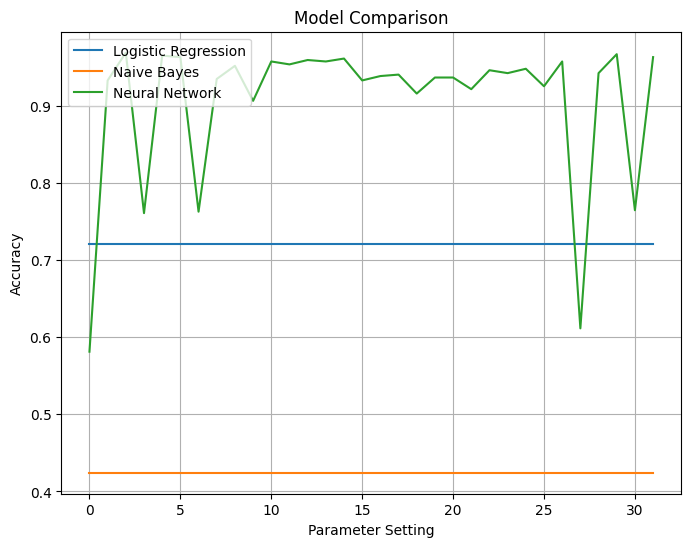


Iteration 33 - Learning Rate: 0.001, Activation Function: tanh, Max Iter: 10000
Accuracy for Logistic Regression = 0.721591
Accuracy for Naive Bayes = 0.424242
Accuracy for Neural Network with tanh activation function = 0.960227

Confusion Matrix for Logistic Regression:
[[61  4  0  0  0  2  1]
 [24 29  1  0  0 11 13]
 [ 0  0 63 17  4  5  5]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3  8  3  0  0 43 14]
 [ 0  2 15  5  1  7 33]]

Confusion Matrix for Naive Bayes:
[[26  5 16  0 17  3  1]
 [13 15 10  9 23  3  5]
 [ 0  0 47 10 34  1  2]
 [ 0  0 35 40  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3 10 20  5 23 10  0]
 [ 0  0 26  8 21  0  8]]

Confusion Matrix for Neural Network:
[[67  1  0  0  0  0  0]
 [ 5 70  0  0  0  3  0]
 [ 0  0 92  2  0  0  0]
 [ 0  0  0 75  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 0  4  0  0  0 64  3]
 [ 0  0  0  0  0  2 61]]


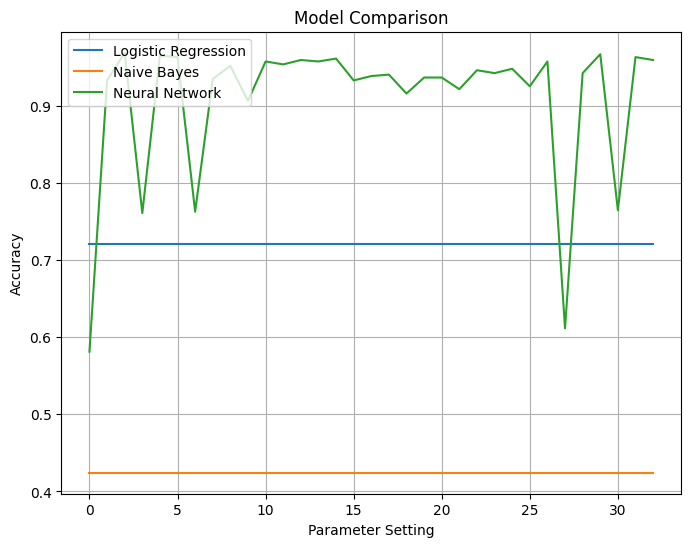

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 34 - Learning Rate: 0.001, Activation Function: relu, Max Iter: 100
Accuracy for Logistic Regression = 0.721591
Accuracy for Naive Bayes = 0.424242
Accuracy for Neural Network with relu activation function = 0.759470

Confusion Matrix for Logistic Regression:
[[61  4  0  0  0  2  1]
 [24 29  1  0  0 11 13]
 [ 0  0 63 17  4  5  5]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3  8  3  0  0 43 14]
 [ 0  2 15  5  1  7 33]]

Confusion Matrix for Naive Bayes:
[[26  5 16  0 17  3  1]
 [13 15 10  9 23  3  5]
 [ 0  0 47 10 34  1  2]
 [ 0  0 35 40  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3 10 20  5 23 10  0]
 [ 0  0 26  8 21  0  8]]

Confusion Matrix for Neural Network:
[[61  5  0  0  0  1  1]
 [18 37  1  0  0 11 11]
 [ 0  0 69 15  3  2  5]
 [ 0  0  2 73  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 2 10  3  0  0 45 11]
 [ 0  1 12  3  0  9 38]]


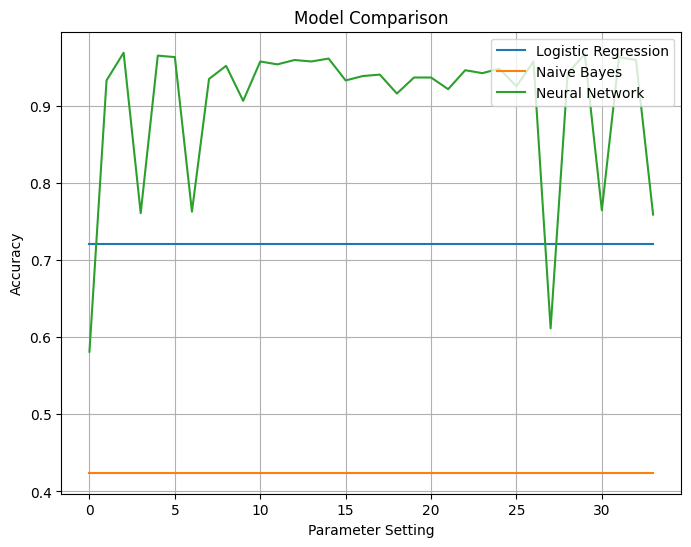


Iteration 35 - Learning Rate: 0.001, Activation Function: relu, Max Iter: 1000
Accuracy for Logistic Regression = 0.721591
Accuracy for Naive Bayes = 0.424242
Accuracy for Neural Network with relu activation function = 0.937500

Confusion Matrix for Logistic Regression:
[[61  4  0  0  0  2  1]
 [24 29  1  0  0 11 13]
 [ 0  0 63 17  4  5  5]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3  8  3  0  0 43 14]
 [ 0  2 15  5  1  7 33]]

Confusion Matrix for Naive Bayes:
[[26  5 16  0 17  3  1]
 [13 15 10  9 23  3  5]
 [ 0  0 47 10 34  1  2]
 [ 0  0 35 40  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3 10 20  5 23 10  0]
 [ 0  0 26  8 21  0  8]]

Confusion Matrix for Neural Network:
[[67  1  0  0  0  0  0]
 [ 4 68  0  0  0  6  0]
 [ 0  0 90  4  0  0  0]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 0  5  0  0  0 64  2]
 [ 0  0  3  0  0  6 54]]


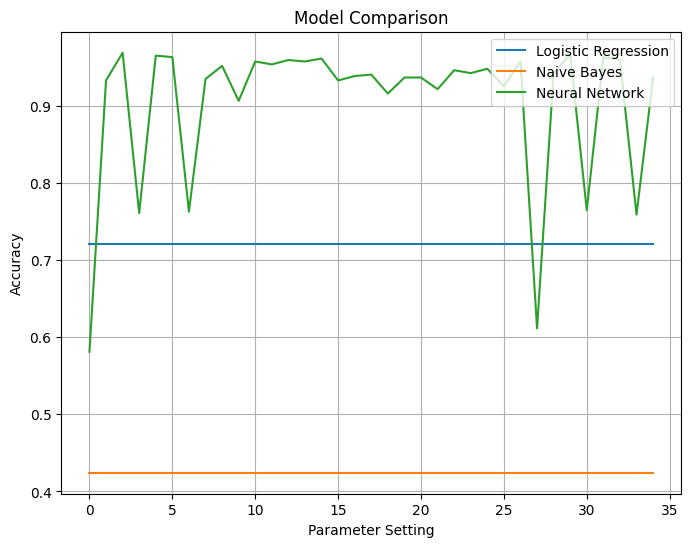


Iteration 36 - Learning Rate: 0.001, Activation Function: relu, Max Iter: 10000
Accuracy for Logistic Regression = 0.721591
Accuracy for Naive Bayes = 0.424242
Accuracy for Neural Network with relu activation function = 0.948864

Confusion Matrix for Logistic Regression:
[[61  4  0  0  0  2  1]
 [24 29  1  0  0 11 13]
 [ 0  0 63 17  4  5  5]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3  8  3  0  0 43 14]
 [ 0  2 15  5  1  7 33]]

Confusion Matrix for Naive Bayes:
[[26  5 16  0 17  3  1]
 [13 15 10  9 23  3  5]
 [ 0  0 47 10 34  1  2]
 [ 0  0 35 40  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3 10 20  5 23 10  0]
 [ 0  0 26  8 21  0  8]]

Confusion Matrix for Neural Network:
[[66  2  0  0  0  0  0]
 [ 4 69  0  0  0  5  0]
 [ 0  0 91  2  0  0  1]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 0  3  0  0  0 66  2]
 [ 0  0  2  0  0  4 57]]


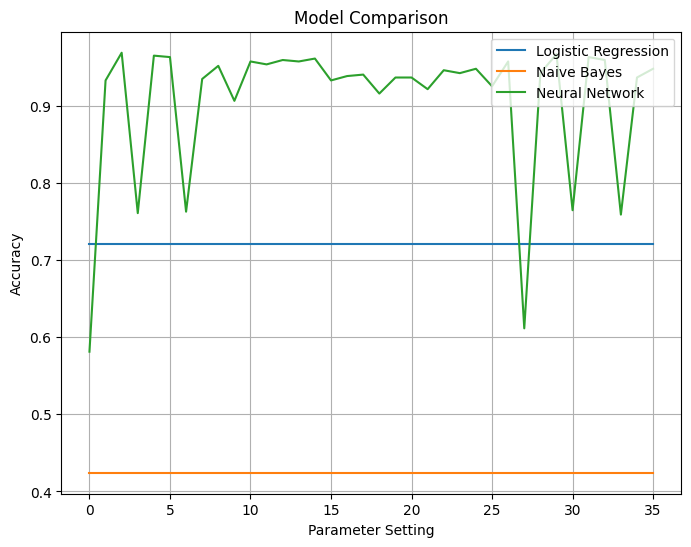

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 37 - Learning Rate: 0.01, Activation Function: logistic, Max Iter: 100
Accuracy for Logistic Regression = 0.721591
Accuracy for Naive Bayes = 0.424242
Accuracy for Neural Network with logistic activation function = 0.918561

Confusion Matrix for Logistic Regression:
[[61  4  0  0  0  2  1]
 [24 29  1  0  0 11 13]
 [ 0  0 63 17  4  5  5]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3  8  3  0  0 43 14]
 [ 0  2 15  5  1  7 33]]

Confusion Matrix for Naive Bayes:
[[26  5 16  0 17  3  1]
 [13 15 10  9 23  3  5]
 [ 0  0 47 10 34  1  2]
 [ 0  0 35 40  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3 10 20  5 23 10  0]
 [ 0  0 26  8 21  0  8]]

Confusion Matrix for Neural Network:
[[67  1  0  0  0  0  0]
 [ 7 66  0  0  0  5  0]
 [ 0  0 88  4  0  0  2]
 [ 0  0  0 75  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 0  9  0  0  0 56  6]
 [ 0  0  1  0  0  7 55]]


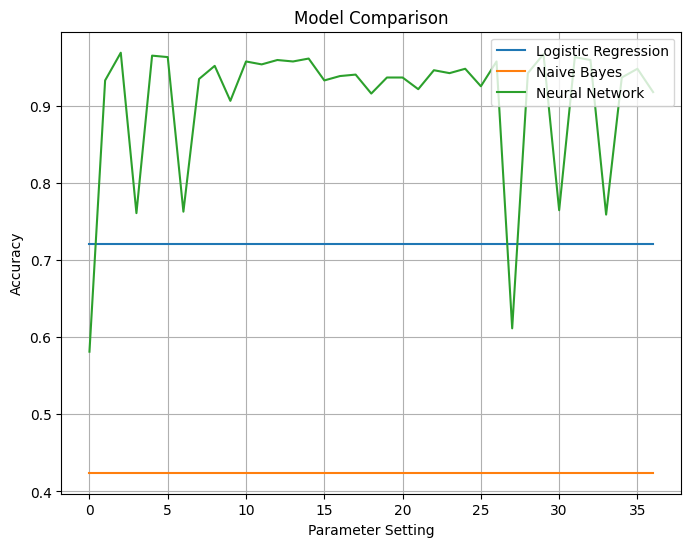


Iteration 38 - Learning Rate: 0.01, Activation Function: logistic, Max Iter: 1000
Accuracy for Logistic Regression = 0.721591
Accuracy for Naive Bayes = 0.424242
Accuracy for Neural Network with logistic activation function = 0.962121

Confusion Matrix for Logistic Regression:
[[61  4  0  0  0  2  1]
 [24 29  1  0  0 11 13]
 [ 0  0 63 17  4  5  5]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3  8  3  0  0 43 14]
 [ 0  2 15  5  1  7 33]]

Confusion Matrix for Naive Bayes:
[[26  5 16  0 17  3  1]
 [13 15 10  9 23  3  5]
 [ 0  0 47 10 34  1  2]
 [ 0  0 35 40  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3 10 20  5 23 10  0]
 [ 0  0 26  8 21  0  8]]

Confusion Matrix for Neural Network:
[[67  1  0  0  0  0  0]
 [ 4 71  0  0  0  3  0]
 [ 0  0 90  3  0  0  1]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 0  2  0  0  0 67  2]
 [ 0  0  1  0  0  1 61]]


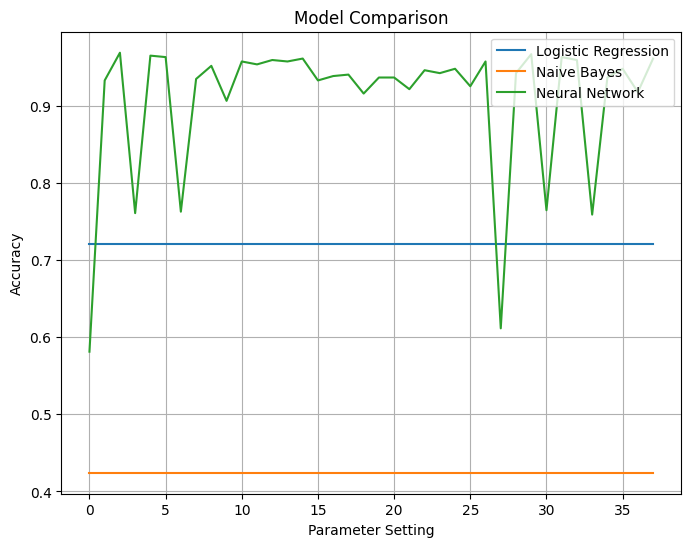


Iteration 39 - Learning Rate: 0.01, Activation Function: logistic, Max Iter: 10000
Accuracy for Logistic Regression = 0.721591
Accuracy for Naive Bayes = 0.424242
Accuracy for Neural Network with logistic activation function = 0.958333

Confusion Matrix for Logistic Regression:
[[61  4  0  0  0  2  1]
 [24 29  1  0  0 11 13]
 [ 0  0 63 17  4  5  5]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3  8  3  0  0 43 14]
 [ 0  2 15  5  1  7 33]]

Confusion Matrix for Naive Bayes:
[[26  5 16  0 17  3  1]
 [13 15 10  9 23  3  5]
 [ 0  0 47 10 34  1  2]
 [ 0  0 35 40  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3 10 20  5 23 10  0]
 [ 0  0 26  8 21  0  8]]

Confusion Matrix for Neural Network:
[[68  0  0  0  0  0  0]
 [ 8 68  0  0  0  2  0]
 [ 0  0 92  2  0  0  0]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 0  2  0  0  0 69  0]
 [ 0  0  1  0  0  5 57]]


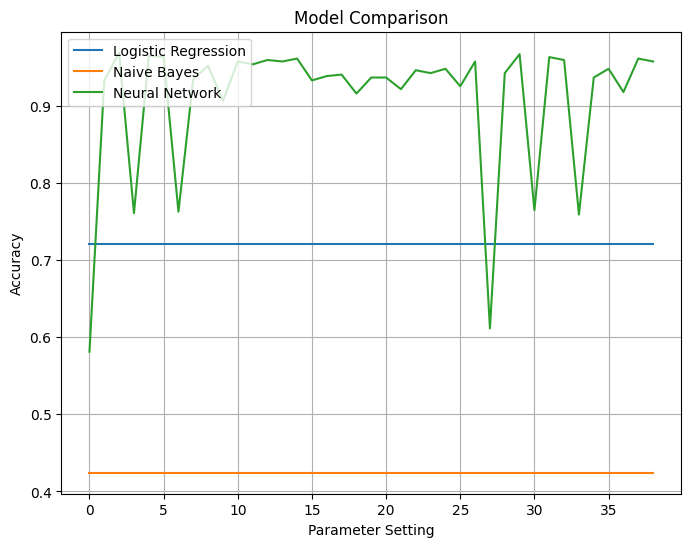

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 40 - Learning Rate: 0.01, Activation Function: tanh, Max Iter: 100
Accuracy for Logistic Regression = 0.721591
Accuracy for Naive Bayes = 0.424242
Accuracy for Neural Network with tanh activation function = 0.954545

Confusion Matrix for Logistic Regression:
[[61  4  0  0  0  2  1]
 [24 29  1  0  0 11 13]
 [ 0  0 63 17  4  5  5]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3  8  3  0  0 43 14]
 [ 0  2 15  5  1  7 33]]

Confusion Matrix for Naive Bayes:
[[26  5 16  0 17  3  1]
 [13 15 10  9 23  3  5]
 [ 0  0 47 10 34  1  2]
 [ 0  0 35 40  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3 10 20  5 23 10  0]
 [ 0  0 26  8 21  0  8]]

Confusion Matrix for Neural Network:
[[68  0  0  0  0  0  0]
 [ 8 67  0  0  0  3  0]
 [ 0  0 92  2  0  0  0]
 [ 0  0  0 75  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 0  3  0  0  0 66  2]
 [ 0  0  1  0  0  4 58]]


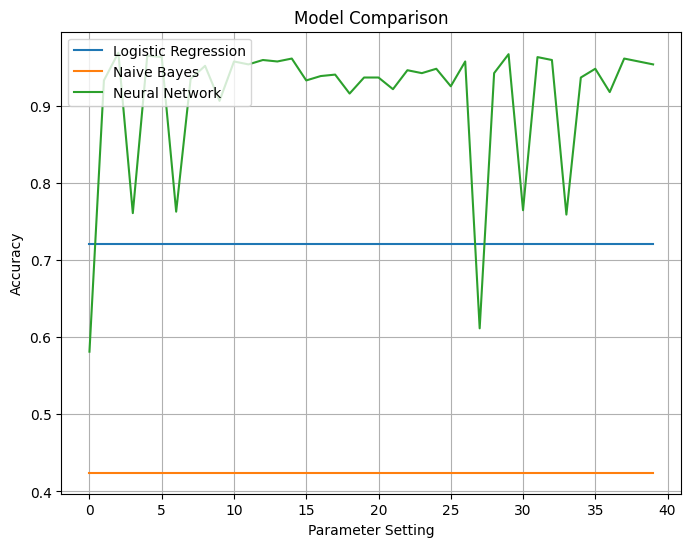


Iteration 41 - Learning Rate: 0.01, Activation Function: tanh, Max Iter: 1000
Accuracy for Logistic Regression = 0.721591
Accuracy for Naive Bayes = 0.424242
Accuracy for Neural Network with tanh activation function = 0.952652

Confusion Matrix for Logistic Regression:
[[61  4  0  0  0  2  1]
 [24 29  1  0  0 11 13]
 [ 0  0 63 17  4  5  5]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3  8  3  0  0 43 14]
 [ 0  2 15  5  1  7 33]]

Confusion Matrix for Naive Bayes:
[[26  5 16  0 17  3  1]
 [13 15 10  9 23  3  5]
 [ 0  0 47 10 34  1  2]
 [ 0  0 35 40  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3 10 20  5 23 10  0]
 [ 0  0 26  8 21  0  8]]

Confusion Matrix for Neural Network:
[[67  1  0  0  0  0  0]
 [ 7 68  0  0  0  3  0]
 [ 0  0 93  1  0  0  0]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 0  3  0  0  0 66  2]
 [ 0  0  0  0  0  6 57]]


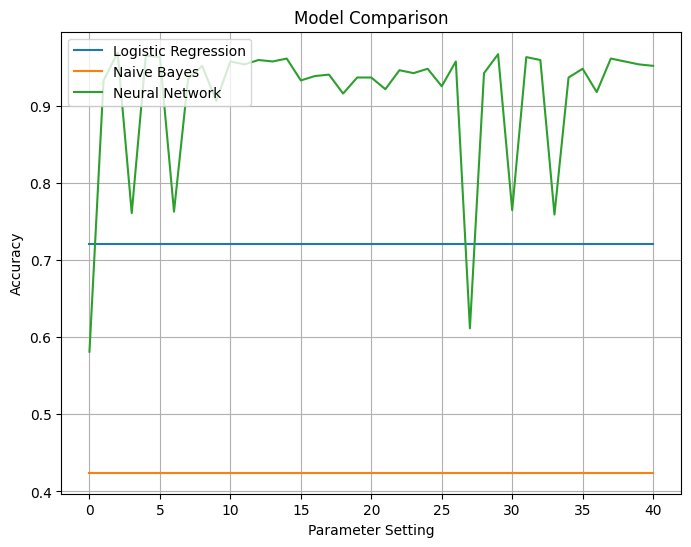


Iteration 42 - Learning Rate: 0.01, Activation Function: tanh, Max Iter: 10000
Accuracy for Logistic Regression = 0.721591
Accuracy for Naive Bayes = 0.424242
Accuracy for Neural Network with tanh activation function = 0.956439

Confusion Matrix for Logistic Regression:
[[61  4  0  0  0  2  1]
 [24 29  1  0  0 11 13]
 [ 0  0 63 17  4  5  5]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3  8  3  0  0 43 14]
 [ 0  2 15  5  1  7 33]]

Confusion Matrix for Naive Bayes:
[[26  5 16  0 17  3  1]
 [13 15 10  9 23  3  5]
 [ 0  0 47 10 34  1  2]
 [ 0  0 35 40  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3 10 20  5 23 10  0]
 [ 0  0 26  8 21  0  8]]

Confusion Matrix for Neural Network:
[[67  1  0  0  0  0  0]
 [ 6 67  0  0  0  5  0]
 [ 0  0 92  2  0  0  0]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 0  4  0  0  0 67  0]
 [ 0  0  0  0  0  3 60]]


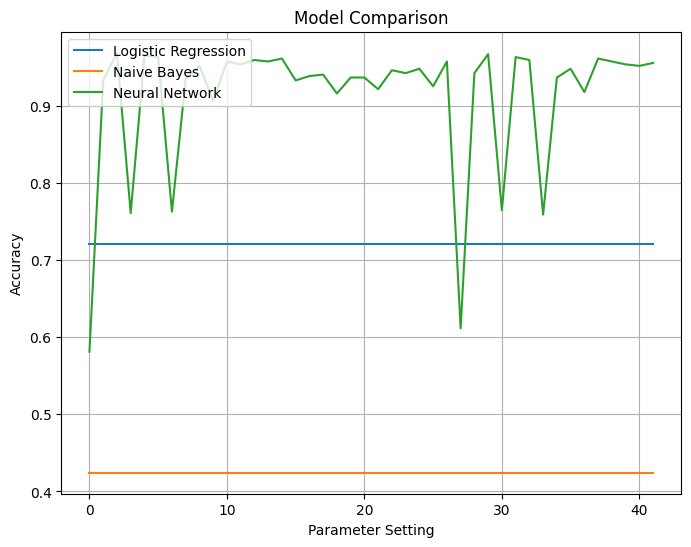

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 43 - Learning Rate: 0.01, Activation Function: relu, Max Iter: 100
Accuracy for Logistic Regression = 0.721591
Accuracy for Naive Bayes = 0.424242
Accuracy for Neural Network with relu activation function = 0.924242

Confusion Matrix for Logistic Regression:
[[61  4  0  0  0  2  1]
 [24 29  1  0  0 11 13]
 [ 0  0 63 17  4  5  5]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3  8  3  0  0 43 14]
 [ 0  2 15  5  1  7 33]]

Confusion Matrix for Naive Bayes:
[[26  5 16  0 17  3  1]
 [13 15 10  9 23  3  5]
 [ 0  0 47 10 34  1  2]
 [ 0  0 35 40  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3 10 20  5 23 10  0]
 [ 0  0 26  8 21  0  8]]

Confusion Matrix for Neural Network:
[[64  4  0  0  0  0  0]
 [ 4 70  0  0  0  4  0]
 [ 0  0 87  6  0  0  1]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 0  9  0  0  0 59  3]
 [ 0  0  0  0  0  7 56]]


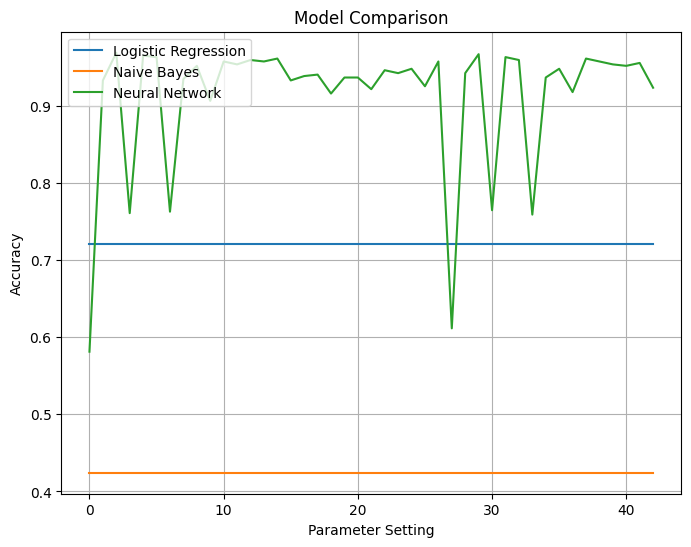


Iteration 44 - Learning Rate: 0.01, Activation Function: relu, Max Iter: 1000
Accuracy for Logistic Regression = 0.721591
Accuracy for Naive Bayes = 0.424242
Accuracy for Neural Network with relu activation function = 0.937500

Confusion Matrix for Logistic Regression:
[[61  4  0  0  0  2  1]
 [24 29  1  0  0 11 13]
 [ 0  0 63 17  4  5  5]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3  8  3  0  0 43 14]
 [ 0  2 15  5  1  7 33]]

Confusion Matrix for Naive Bayes:
[[26  5 16  0 17  3  1]
 [13 15 10  9 23  3  5]
 [ 0  0 47 10 34  1  2]
 [ 0  0 35 40  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3 10 20  5 23 10  0]
 [ 0  0 26  8 21  0  8]]

Confusion Matrix for Neural Network:
[[64  4  0  0  0  0  0]
 [ 5 67  0  0  0  6  0]
 [ 0  0 90  3  0  0  1]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 0  4  0  0  0 66  1]
 [ 0  0  2  0  0  5 56]]


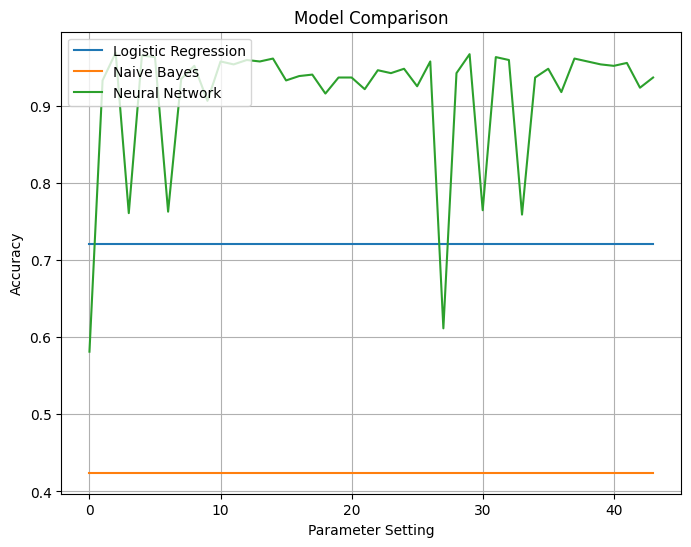


Iteration 45 - Learning Rate: 0.01, Activation Function: relu, Max Iter: 10000
Accuracy for Logistic Regression = 0.721591
Accuracy for Naive Bayes = 0.424242
Accuracy for Neural Network with relu activation function = 0.939394

Confusion Matrix for Logistic Regression:
[[61  4  0  0  0  2  1]
 [24 29  1  0  0 11 13]
 [ 0  0 63 17  4  5  5]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3  8  3  0  0 43 14]
 [ 0  2 15  5  1  7 33]]

Confusion Matrix for Naive Bayes:
[[26  5 16  0 17  3  1]
 [13 15 10  9 23  3  5]
 [ 0  0 47 10 34  1  2]
 [ 0  0 35 40  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3 10 20  5 23 10  0]
 [ 0  0 26  8 21  0  8]]

Confusion Matrix for Neural Network:
[[67  1  0  0  0  0  0]
 [ 4 70  0  0  0  4  0]
 [ 0  0 89  4  0  0  1]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 0  5  0  0  0 64  2]
 [ 0  0  1  0  0  8 54]]


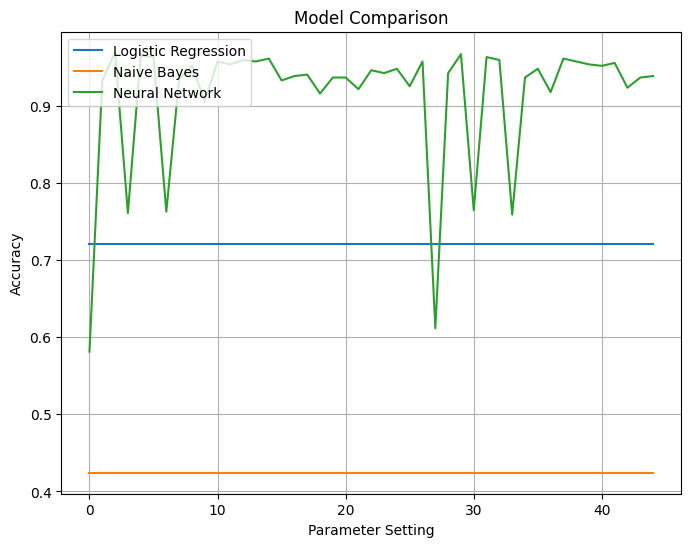

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 46 - Learning Rate: 0.1, Activation Function: logistic, Max Iter: 100
Accuracy for Logistic Regression = 0.721591
Accuracy for Naive Bayes = 0.424242
Accuracy for Neural Network with logistic activation function = 0.946970

Confusion Matrix for Logistic Regression:
[[61  4  0  0  0  2  1]
 [24 29  1  0  0 11 13]
 [ 0  0 63 17  4  5  5]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3  8  3  0  0 43 14]
 [ 0  2 15  5  1  7 33]]

Confusion Matrix for Naive Bayes:
[[26  5 16  0 17  3  1]
 [13 15 10  9 23  3  5]
 [ 0  0 47 10 34  1  2]
 [ 0  0 35 40  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3 10 20  5 23 10  0]
 [ 0  0 26  8 21  0  8]]

Confusion Matrix for Neural Network:
[[68  0  0  0  0  0  0]
 [ 5 68  0  0  0  5  0]
 [ 0  0 91  3  0  0  0]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 0  4  0  0  0 65  2]
 [ 0  0  2  0  0  5 56]]


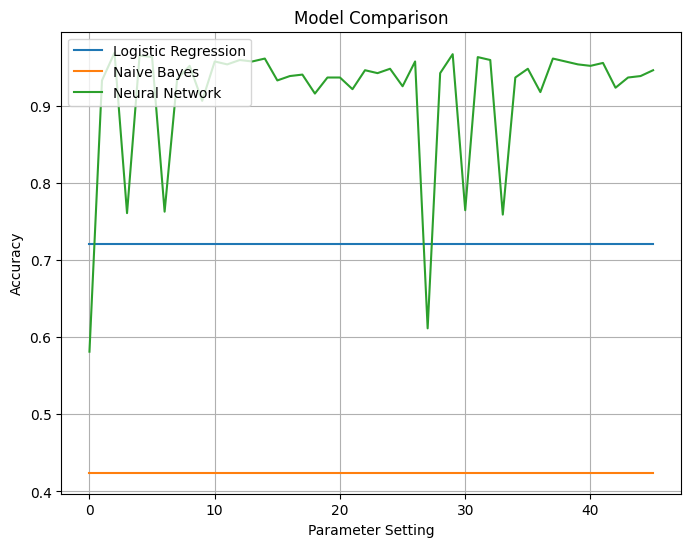


Iteration 47 - Learning Rate: 0.1, Activation Function: logistic, Max Iter: 1000
Accuracy for Logistic Regression = 0.721591
Accuracy for Naive Bayes = 0.424242
Accuracy for Neural Network with logistic activation function = 0.933712

Confusion Matrix for Logistic Regression:
[[61  4  0  0  0  2  1]
 [24 29  1  0  0 11 13]
 [ 0  0 63 17  4  5  5]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3  8  3  0  0 43 14]
 [ 0  2 15  5  1  7 33]]

Confusion Matrix for Naive Bayes:
[[26  5 16  0 17  3  1]
 [13 15 10  9 23  3  5]
 [ 0  0 47 10 34  1  2]
 [ 0  0 35 40  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3 10 20  5 23 10  0]
 [ 0  0 26  8 21  0  8]]

Confusion Matrix for Neural Network:
[[66  2  0  0  0  0  0]
 [ 5 65  0  0  0  8  0]
 [ 0  0 89  5  0  0  0]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 0  0  0  0  0 68  3]
 [ 0  0  4  0  0  6 53]]


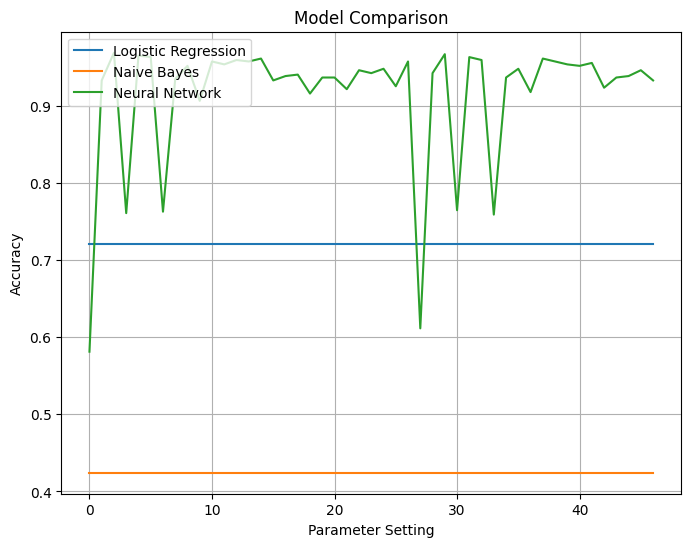


Iteration 48 - Learning Rate: 0.1, Activation Function: logistic, Max Iter: 10000
Accuracy for Logistic Regression = 0.721591
Accuracy for Naive Bayes = 0.424242
Accuracy for Neural Network with logistic activation function = 0.943182

Confusion Matrix for Logistic Regression:
[[61  4  0  0  0  2  1]
 [24 29  1  0  0 11 13]
 [ 0  0 63 17  4  5  5]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3  8  3  0  0 43 14]
 [ 0  2 15  5  1  7 33]]

Confusion Matrix for Naive Bayes:
[[26  5 16  0 17  3  1]
 [13 15 10  9 23  3  5]
 [ 0  0 47 10 34  1  2]
 [ 0  0 35 40  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3 10 20  5 23 10  0]
 [ 0  0 26  8 21  0  8]]

Confusion Matrix for Neural Network:
[[66  2  0  0  0  0  0]
 [ 4 70  0  0  0  4  0]
 [ 0  0 89  3  0  0  2]
 [ 0  0  0 75  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 0  4  0  0  0 64  3]
 [ 0  0  1  0  0  6 56]]


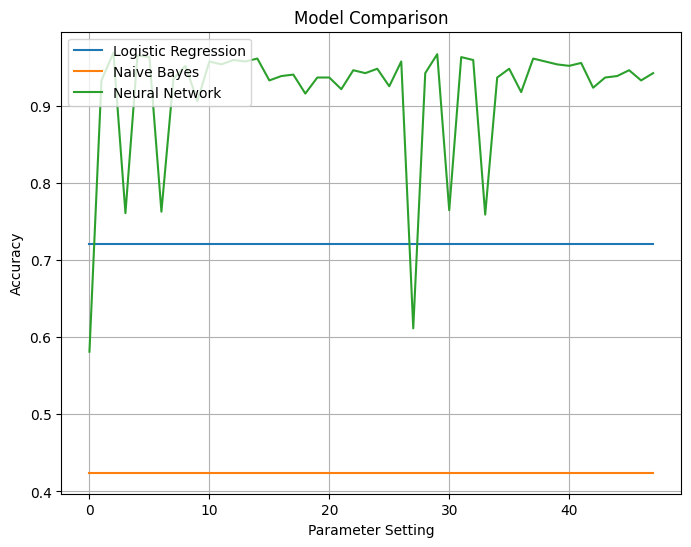

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 49 - Learning Rate: 0.1, Activation Function: tanh, Max Iter: 100
Accuracy for Logistic Regression = 0.721591
Accuracy for Naive Bayes = 0.424242
Accuracy for Neural Network with tanh activation function = 0.924242

Confusion Matrix for Logistic Regression:
[[61  4  0  0  0  2  1]
 [24 29  1  0  0 11 13]
 [ 0  0 63 17  4  5  5]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3  8  3  0  0 43 14]
 [ 0  2 15  5  1  7 33]]

Confusion Matrix for Naive Bayes:
[[26  5 16  0 17  3  1]
 [13 15 10  9 23  3  5]
 [ 0  0 47 10 34  1  2]
 [ 0  0 35 40  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3 10 20  5 23 10  0]
 [ 0  0 26  8 21  0  8]]

Confusion Matrix for Neural Network:
[[68  0  0  0  0  0  0]
 [ 6 64  0  0  0  8  0]
 [ 0  0 91  3  0  0  0]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 0  4  0  0  0 65  2]
 [ 0  0  3  0  0 12 48]]


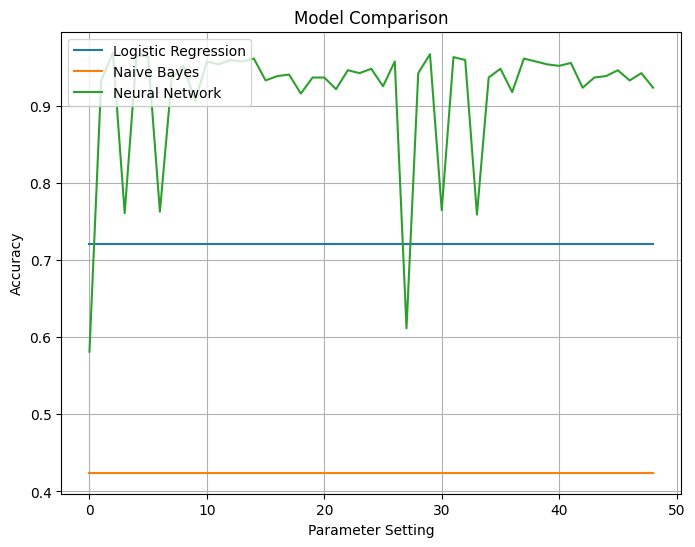


Iteration 50 - Learning Rate: 0.1, Activation Function: tanh, Max Iter: 1000
Accuracy for Logistic Regression = 0.721591
Accuracy for Naive Bayes = 0.424242
Accuracy for Neural Network with tanh activation function = 0.945076

Confusion Matrix for Logistic Regression:
[[61  4  0  0  0  2  1]
 [24 29  1  0  0 11 13]
 [ 0  0 63 17  4  5  5]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3  8  3  0  0 43 14]
 [ 0  2 15  5  1  7 33]]

Confusion Matrix for Naive Bayes:
[[26  5 16  0 17  3  1]
 [13 15 10  9 23  3  5]
 [ 0  0 47 10 34  1  2]
 [ 0  0 35 40  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3 10 20  5 23 10  0]
 [ 0  0 26  8 21  0  8]]

Confusion Matrix for Neural Network:
[[66  2  0  0  0  0  0]
 [ 4 67  0  0  0  7  0]
 [ 0  0 91  2  0  0  1]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 0  3  0  0  0 66  2]
 [ 0  0  2  0  0  4 57]]


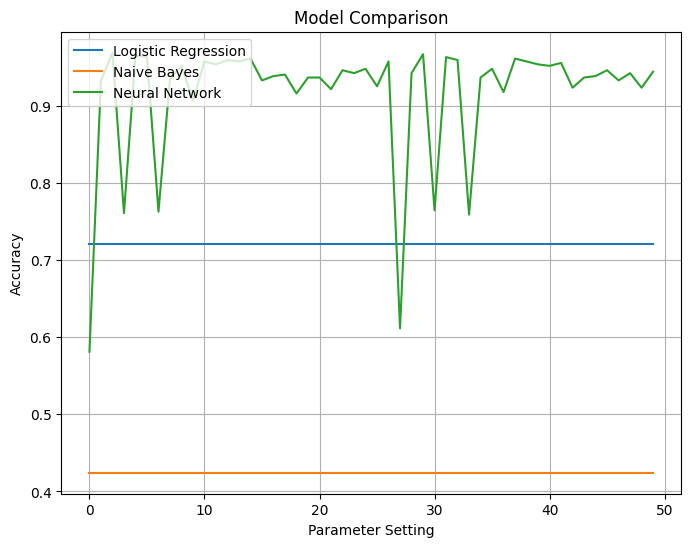


Iteration 51 - Learning Rate: 0.1, Activation Function: tanh, Max Iter: 10000
Accuracy for Logistic Regression = 0.721591
Accuracy for Naive Bayes = 0.424242
Accuracy for Neural Network with tanh activation function = 0.937500

Confusion Matrix for Logistic Regression:
[[61  4  0  0  0  2  1]
 [24 29  1  0  0 11 13]
 [ 0  0 63 17  4  5  5]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3  8  3  0  0 43 14]
 [ 0  2 15  5  1  7 33]]

Confusion Matrix for Naive Bayes:
[[26  5 16  0 17  3  1]
 [13 15 10  9 23  3  5]
 [ 0  0 47 10 34  1  2]
 [ 0  0 35 40  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3 10 20  5 23 10  0]
 [ 0  0 26  8 21  0  8]]

Confusion Matrix for Neural Network:
[[67  1  0  0  0  0  0]
 [ 5 62  0  0  0 11  0]
 [ 0  0 88  6  0  0  0]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 0  2  0  0  0 68  1]
 [ 0  0  2  0  0  3 58]]


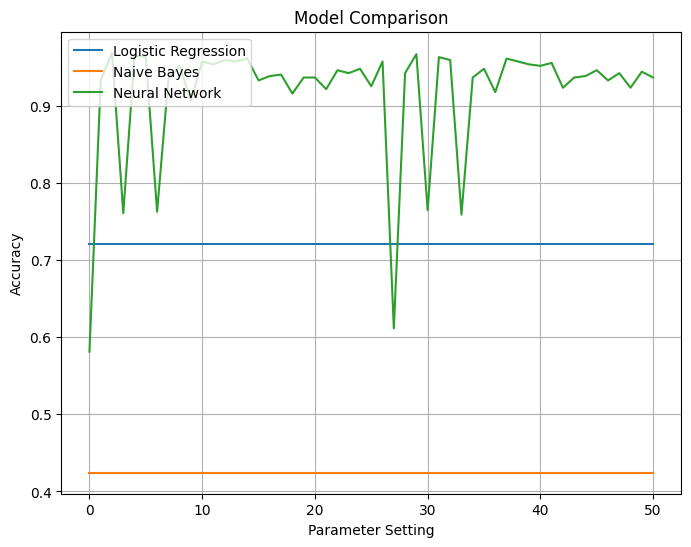

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 52 - Learning Rate: 0.1, Activation Function: relu, Max Iter: 100
Accuracy for Logistic Regression = 0.721591
Accuracy for Naive Bayes = 0.424242
Accuracy for Neural Network with relu activation function = 0.882576

Confusion Matrix for Logistic Regression:
[[61  4  0  0  0  2  1]
 [24 29  1  0  0 11 13]
 [ 0  0 63 17  4  5  5]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3  8  3  0  0 43 14]
 [ 0  2 15  5  1  7 33]]

Confusion Matrix for Naive Bayes:
[[26  5 16  0 17  3  1]
 [13 15 10  9 23  3  5]
 [ 0  0 47 10 34  1  2]
 [ 0  0 35 40  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3 10 20  5 23 10  0]
 [ 0  0 26  8 21  0  8]]

Confusion Matrix for Neural Network:
[[68  0  0  0  0  0  0]
 [14 63  0  0  0  1  0]
 [ 0  0 83  0  0  0 11]
 [ 0  0 18 57  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 0  4  0  0  0 66  1]
 [ 0  0  0  0  0 12 51]]


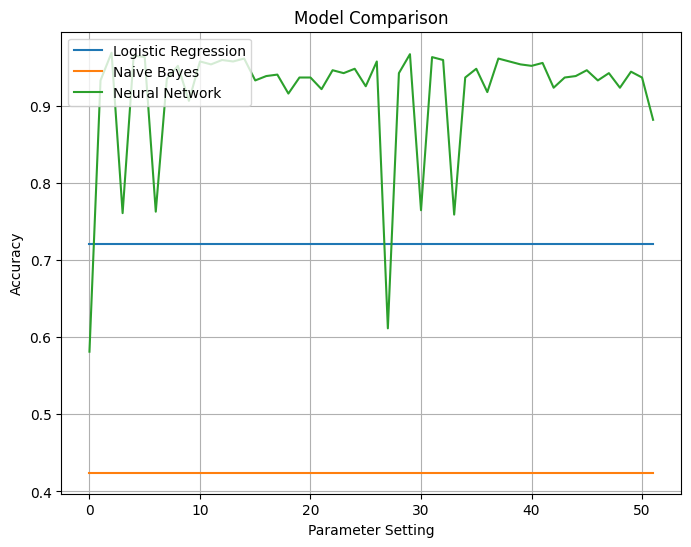


Iteration 53 - Learning Rate: 0.1, Activation Function: relu, Max Iter: 1000
Accuracy for Logistic Regression = 0.721591
Accuracy for Naive Bayes = 0.424242
Accuracy for Neural Network with relu activation function = 0.941288

Confusion Matrix for Logistic Regression:
[[61  4  0  0  0  2  1]
 [24 29  1  0  0 11 13]
 [ 0  0 63 17  4  5  5]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3  8  3  0  0 43 14]
 [ 0  2 15  5  1  7 33]]

Confusion Matrix for Naive Bayes:
[[26  5 16  0 17  3  1]
 [13 15 10  9 23  3  5]
 [ 0  0 47 10 34  1  2]
 [ 0  0 35 40  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3 10 20  5 23 10  0]
 [ 0  0 26  8 21  0  8]]

Confusion Matrix for Neural Network:
[[68  0  0  0  0  0  0]
 [ 7 66  0  0  0  3  2]
 [ 0  0 90  1  0  0  3]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 0  4  0  0  0 65  2]
 [ 0  0  2  0  0  5 56]]


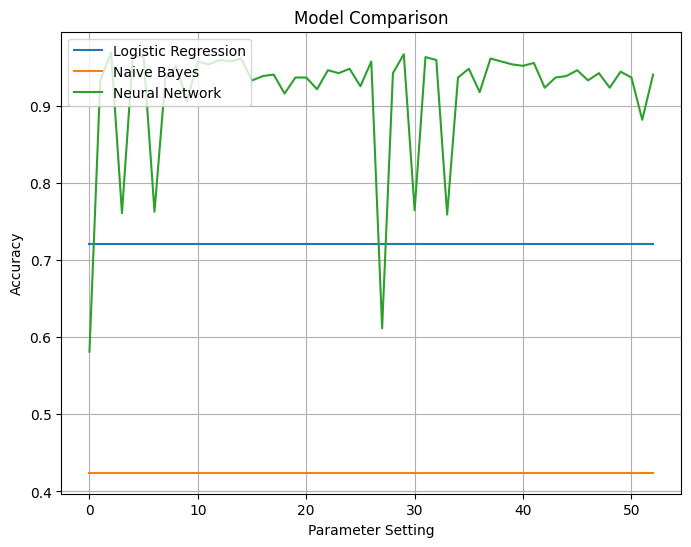


Iteration 54 - Learning Rate: 0.1, Activation Function: relu, Max Iter: 10000
Accuracy for Logistic Regression = 0.721591
Accuracy for Naive Bayes = 0.424242
Accuracy for Neural Network with relu activation function = 0.962121

Confusion Matrix for Logistic Regression:
[[61  4  0  0  0  2  1]
 [24 29  1  0  0 11 13]
 [ 0  0 63 17  4  5  5]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3  8  3  0  0 43 14]
 [ 0  2 15  5  1  7 33]]

Confusion Matrix for Naive Bayes:
[[26  5 16  0 17  3  1]
 [13 15 10  9 23  3  5]
 [ 0  0 47 10 34  1  2]
 [ 0  0 35 40  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 3 10 20  5 23 10  0]
 [ 0  0 26  8 21  0  8]]

Confusion Matrix for Neural Network:
[[66  2  0  0  0  0  0]
 [ 3 73  0  0  0  2  0]
 [ 0  0 91  3  0  0  0]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 0  2  0  0  0 68  1]
 [ 0  0  2  0  0  3 58]]


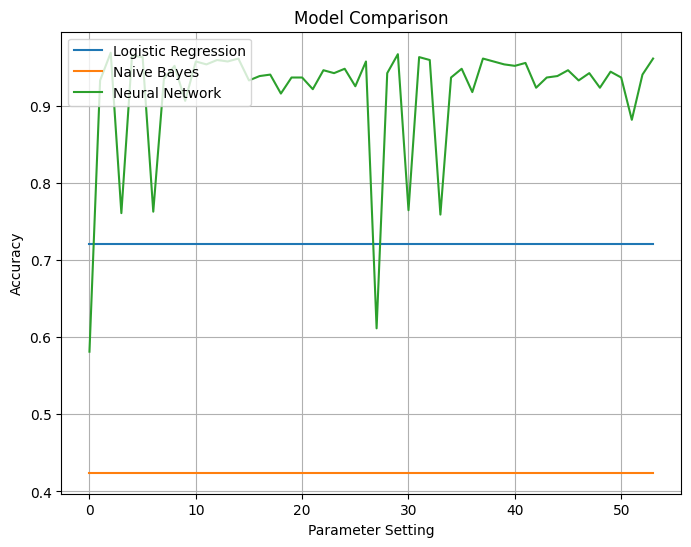

In [ ]:
for learning_rate in learning_rates:
    for activation_function in activation_functions:
        for max_iter in max_iter_values:
            update_models(test_size, learning_rate, activation_function, max_iter)
